# EDA-KHÁM PHÁ DỮ LIỆU

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data files
customers = pd.read_csv('archive\\customers.csv')
orders = pd.read_csv('archive\\orders.csv')
order_items = pd.read_csv('archive\\order_items.csv')
payments = pd.read_csv('archive\\payment.csv')
products = pd.read_csv('archive\\products.csv')
reviews = pd.read_csv('archive\\reviews.csv')
shipments = pd.read_csv('archive\\shipments.csv')
suppliers = pd.read_csv('archive\\suppliers.csv')

# Basic information and missing values check for each dataset
datasets = {
    "customers": customers,
    "orders": orders,
    "order_items": order_items,
    "payments": payments,
    "products": products,
    "reviews": reviews,
    "shipments": shipments,
    "suppliers": suppliers
}

# Collect basic information for all datasets
data_info = {}
for name, df in datasets.items():
    data_info[name] = {
        "Rows": df.shape[0],
        "Columns": df.shape[1],
        "Missing Values": df.isnull().sum().sum(),
        "Sample Columns": df.columns.tolist()
    }

# Display basic information

import ace_tools_open as tools; tools.display_dataframe_to_user(name="Dataset Information Summary", dataframe=pd.DataFrame(data_info).T)


Dataset Information Summary


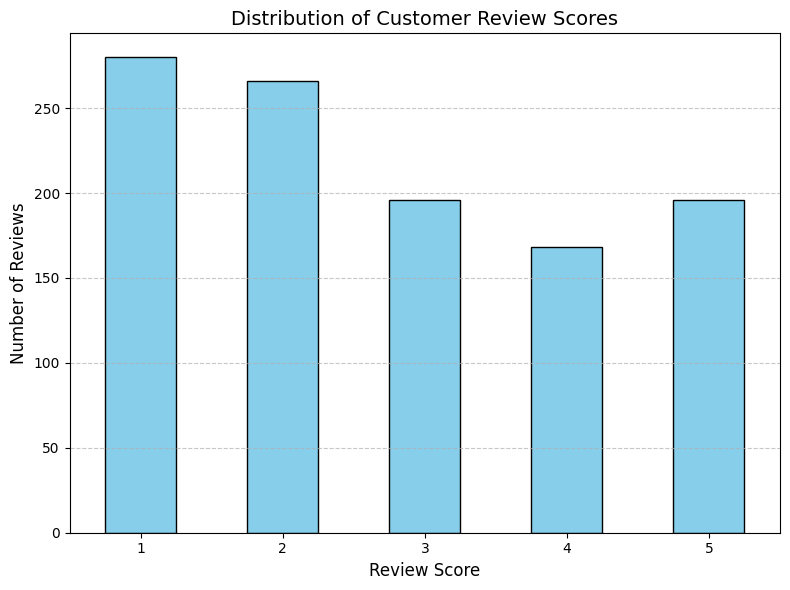

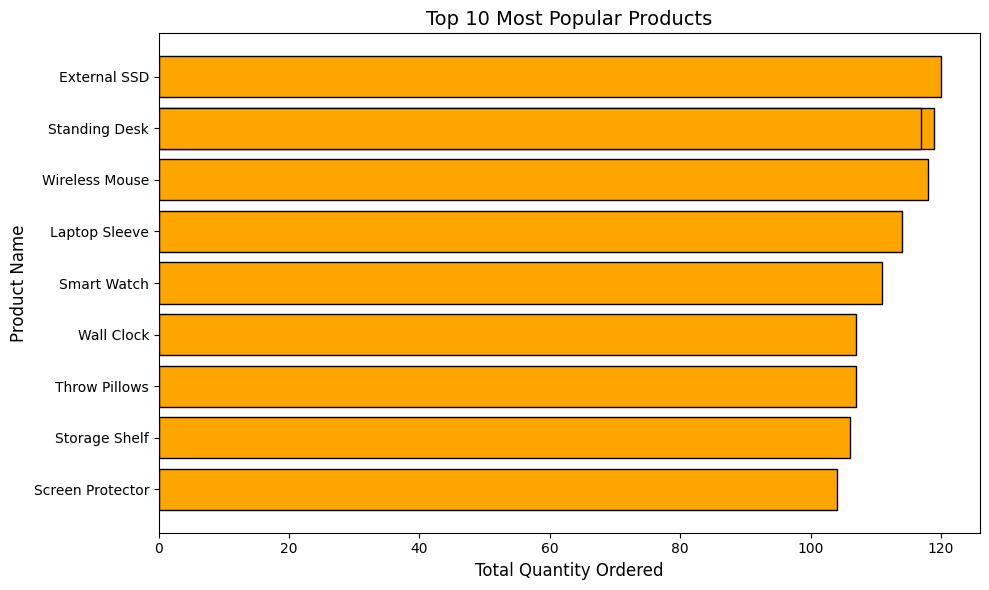

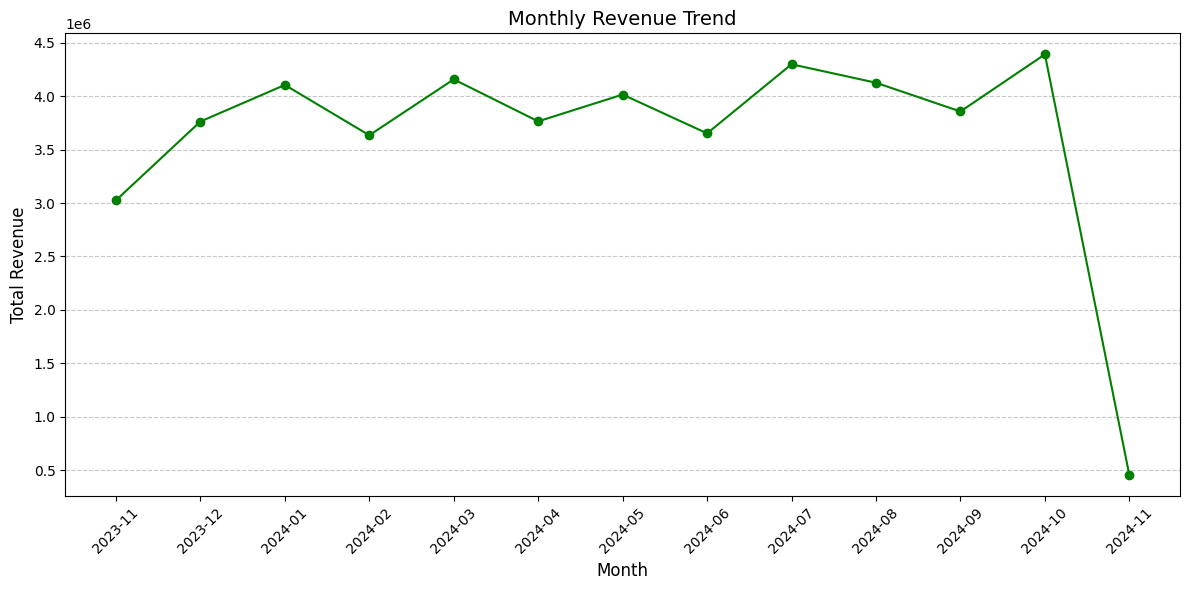

47229907.98

In [10]:
# Correct merge using 'product_id' for reviews and products
reviews_merged = reviews.merge(products, on='product_id', how='inner')

# Distribution of customer reviews (ratings)
plt.figure(figsize=(8, 6))
reviews['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Review Scores', fontsize=14)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Most popular products (by order quantity)
product_popularity = order_items.groupby('product_id')['quantity'].sum().reset_index()
product_popularity = product_popularity.merge(products, on='product_id', how='inner')
top_products = product_popularity.sort_values('quantity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_products['product_name'], top_products['quantity'], color='orange', edgecolor='black')
plt.title('Top 10 Most Popular Products', fontsize=14)
plt.xlabel('Total Quantity Ordered', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Revenue analysis
order_items_revenue = order_items.merge(products, on='product_id', how='inner')
order_items_revenue['total_revenue'] = order_items_revenue['quantity'] * order_items_revenue['price']
total_revenue = order_items_revenue['total_revenue'].sum()

# Monthly revenue trend
orders['order_month'] = pd.to_datetime(orders['order_date']).dt.to_period('M')
monthly_revenue = orders.merge(order_items_revenue, on='order_id', how='inner') \
                        .groupby('order_month')['total_revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['order_month'].astype(str), monthly_revenue['total_revenue'], marker='o', linestyle='-', color='green')
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display total revenue for reference
total_revenue


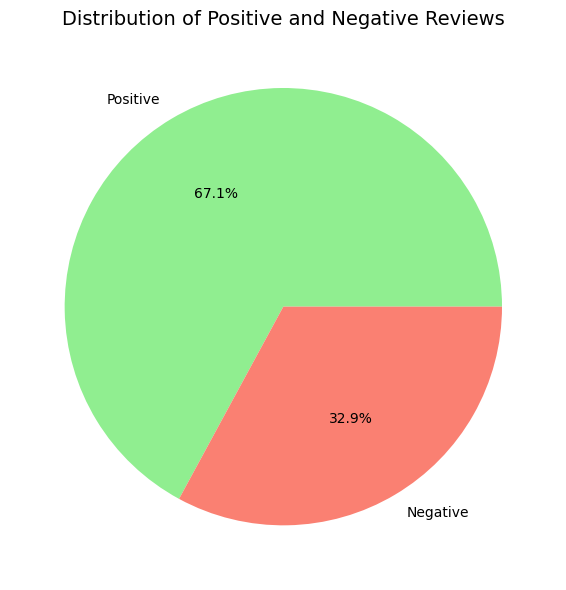

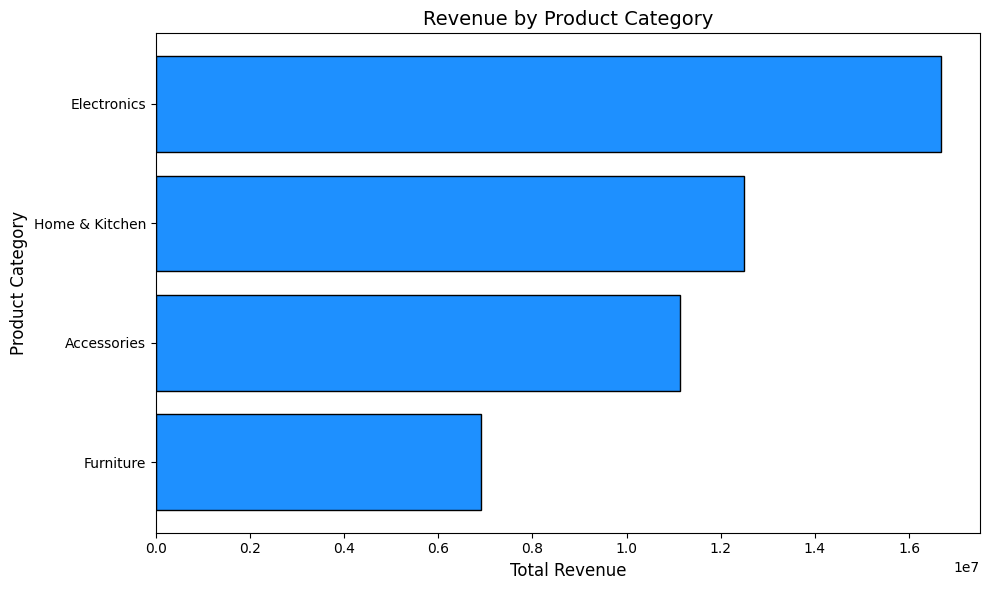

category  total_revenue
0     Electronics    16673401.23
1  Home & Kitchen    12498897.81
2     Accessories    11141284.61
3       Furniture     6916324.33

In [11]:
# 1. Phân tích tỷ lệ đánh giá tích cực và tiêu cực
reviews['review_category'] = reviews['rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')
review_distribution = reviews['review_category'].value_counts(normalize=True) * 100

# Visualization for review category distribution
plt.figure(figsize=(6, 6))
review_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'], labels=['Positive', 'Negative'])
plt.title('Distribution of Positive and Negative Reviews', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

# 2. Doanh thu theo danh mục sản phẩm
category_revenue = order_items_revenue.groupby('category')['total_revenue'].sum().sort_values(ascending=False).reset_index()

# Visualization for revenue by category
plt.figure(figsize=(10, 6))
plt.barh(category_revenue['category'], category_revenue['total_revenue'], color='dodgerblue', edgecolor='black')
plt.title('Revenue by Product Category', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Hiển thị chi tiết dữ liệu doanh thu theo danh mục
category_revenue


In [12]:
# Merging datasets to create a clean, comprehensive dataset
cleaned_data = orders.merge(order_items, on='order_id', how='inner') \
                     .merge(products, on='product_id', how='inner') \
                     .merge(customers, on='customer_id', how='inner') \
                     .merge(reviews[['review_id', 'product_id', 'rating']], on='product_id', how='left') \
                     .merge(payments, on='order_id', how='inner')

# Display the first few rows of the cleaned dataset
cleaned_data.head()

# Save the dataset to a CSV file for reference
cleaned_data.to_csv('archive/cleaned_data.csv', index=False)
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29174 entries, 0 to 29173
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   order_id            29174 non-null  int64    
 1   order_date          29174 non-null  object   
 2   customer_id         29174 non-null  int64    
 3   total_price         29174 non-null  float64  
 4   order_month         29174 non-null  period[M]
 5   order_item_id       29174 non-null  int64    
 6   product_id          29174 non-null  int64    
 7   quantity            29174 non-null  int64    
 8   price_at_purchase   29174 non-null  float64  
 9   product_name        29174 non-null  object   
 10  category            29174 non-null  object   
 11  price               29174 non-null  float64  
 12  supplier_id         29174 non-null  int64    
 13  first_name          29174 non-null  object   
 14  last_name           29174 non-null  object   
 15  address            

# CHUẨN BỊ DỮ LIỆU CHO HUẤN LUYỆN MÔ HÌNH 

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the cleaned data
data_path = 'archive/cleaned_data.csv'
cleaned_data = pd.read_csv(data_path)

# Step 1: Select relevant features for regression
selected_features = [
    'quantity', 'price_at_purchase', 'price', 'amount',
    'category', 'payment_method', 'transaction_status'
]

# Extract target variable
target = 'total_price'

# Filter the relevant columns
regression_data = cleaned_data[selected_features + [target]].copy()

# Step 2: Encode categorical features
categorical_columns = ['category', 'payment_method', 'transaction_status']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    regression_data[col] = le.fit_transform(regression_data[col])
    label_encoders[col] = le  # Store the encoder for future reference

# Check the processed data
regression_data.info()

# Save processed data for reference
regression_data.to_csv('archive/processed_regression_data.csv', index=False)

# Display first few rows of processed data
regression_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29174 entries, 0 to 29173
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quantity            29174 non-null  int64  
 1   price_at_purchase   29174 non-null  float64
 2   price               29174 non-null  float64
 3   amount              29174 non-null  float64
 4   category            29174 non-null  int32  
 5   payment_method      29174 non-null  int32  
 6   transaction_status  29174 non-null  int32  
 7   total_price         29174 non-null  float64
dtypes: float64(4), int32(3), int64(1)
memory usage: 1.4 MB


quantity  price_at_purchase   price  amount  category  payment_method  \
0         1             955.86  940.82    3.00         3               0   
1         1             984.91  180.06  766.80         1               0   
2         1             649.18  856.78   69.57         3               0   
3         1              54.83  445.01  915.70         2               0   
4         1              54.83  445.01  915.70         2               0   

   transaction_status  total_price  
0                   0       955.86  
1                   0       984.91  
2                   0       649.18  
3                   0        54.83  
4                   0        54.83

In [14]:
# Step 1: Select relevant features for classification
classification_features = [
    'quantity', 'price_at_purchase', 'price', 'amount',
    'category', 'payment_method', 'transaction_status'
]

# Extract target variable for classification
classification_target = 'rating'  # Assuming rating will be converted to Positive/Negative

# Create binary target variable for classification (Positive if rating >= 4, Negative otherwise)
cleaned_data['review_category'] = cleaned_data['rating'].apply(lambda x: 1 if x >= 4 else 0)

# Filter relevant columns for classification
classification_data = cleaned_data[classification_features + ['review_category']].copy()

# Step 2: Encode categorical features
for col in categorical_columns:  # Reuse categorical_columns from the regression task
    classification_data[col] = label_encoders[col].transform(classification_data[col])

# Check the processed data for classification
classification_data.info()

# Save processed data for reference
classification_data.to_csv("archive/processed_classification_data.csv", index=False)

# Display first few rows of processed data
classification_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29174 entries, 0 to 29173
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quantity            29174 non-null  int64  
 1   price_at_purchase   29174 non-null  float64
 2   price               29174 non-null  float64
 3   amount              29174 non-null  float64
 4   category            29174 non-null  int32  
 5   payment_method      29174 non-null  int32  
 6   transaction_status  29174 non-null  int32  
 7   review_category     29174 non-null  int64  
dtypes: float64(3), int32(3), int64(2)
memory usage: 1.4 MB


quantity  price_at_purchase   price  amount  category  payment_method  \
0         1             955.86  940.82    3.00         3               0   
1         1             984.91  180.06  766.80         1               0   
2         1             649.18  856.78   69.57         3               0   
3         1              54.83  445.01  915.70         2               0   
4         1              54.83  445.01  915.70         2               0   

   transaction_status  review_category  
0                   0                0  
1                   0                0  
2                   0                0  
3                   0                1  
4                   0                1

# HUẤN LUYỆN VÀ PHÂN TÍCH MÔ HÌNH PHÂN LOẠI

Model Comparison with GridSearchCV and Cross-Validation


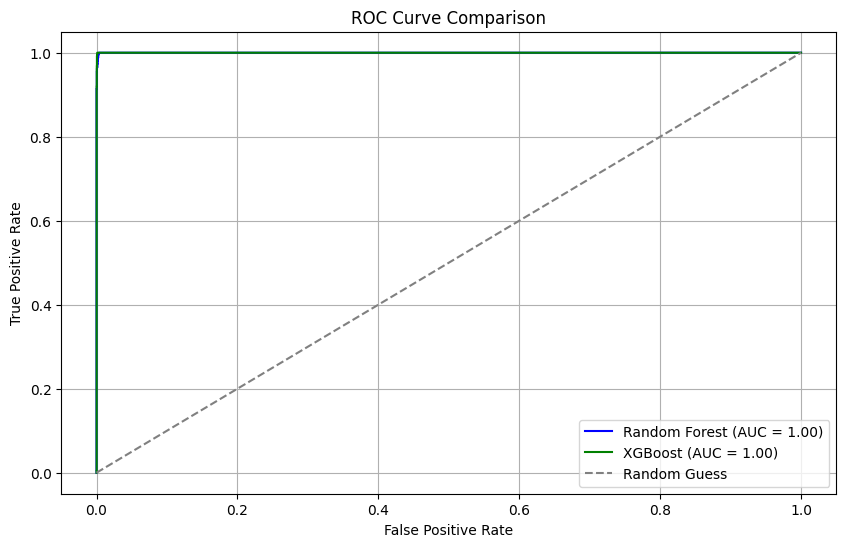

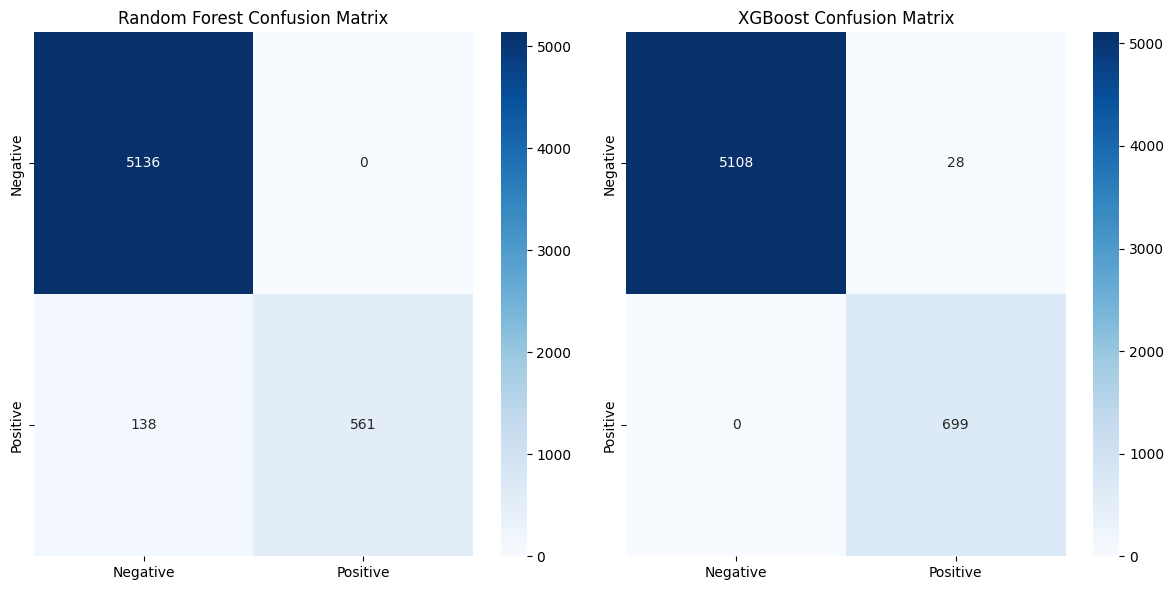

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Prepare features and target for classification
X_class = classification_data.drop(columns=['review_category'])
y_class = classification_data['review_category']

# Step 2: Split data into training and testing sets
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

# Step 3: Set up K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Define model and hyperparameters for GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Step 5: Initialize RandomForest and XGBoost classifiers
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42, eval_metric='logloss')

# Step 6: Apply GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=cv, n_jobs=-1, scoring=make_scorer(roc_auc_score))
rf_grid_search.fit(X_class_train, y_class_train)

# Step 7: Apply GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(xgb_classifier, xgb_param_grid, cv=cv, n_jobs=-1, scoring=make_scorer(roc_auc_score))
xgb_grid_search.fit(X_class_train, y_class_train)

# Step 8: Evaluate models after GridSearchCV
rf_best_model = rf_grid_search.best_estimator_
xgb_best_model = xgb_grid_search.best_estimator_

# Step 9: Cross-validate both models with the optimal hyperparameters
rf_cv_scores = cross_val_score(rf_best_model, X_class_train, y_class_train, cv=cv, scoring='roc_auc')
xgb_cv_scores = cross_val_score(xgb_best_model, X_class_train, y_class_train, cv=cv, scoring='roc_auc')

# Step 10: Display the cross-validation results and best parameters
rf_best_params = rf_grid_search.best_params_
xgb_best_params = xgb_grid_search.best_params_

rf_cv_mean = rf_cv_scores.mean()
xgb_cv_mean = xgb_cv_scores.mean()

# Prepare results for display
results = {
    "Random Forest Best Params": rf_best_params,
    "Random Forest CV ROC-AUC": rf_cv_mean,
    "XGBoost Best Params": xgb_best_params,
    "XGBoost CV ROC-AUC": xgb_cv_mean
}

# Display the results
tools.display_dataframe_to_user(name="Model Comparison with GridSearchCV and Cross-Validation", dataframe=pd.DataFrame([results]))

# Step 11: Get predictions on test set (using the best model from GridSearchCV)
rf_class_pred = rf_best_model.predict(X_class_test)
xgb_class_pred = xgb_best_model.predict(X_class_test)

# Step 12: Compute ROC curve and AUC for both models
rf_fpr, rf_tpr, _ = roc_curve(y_class_test, rf_best_model.predict_proba(X_class_test)[:, 1])
xgb_fpr, xgb_tpr, _ = roc_curve(y_class_test, xgb_best_model.predict_proba(X_class_test)[:, 1])

rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Step 13: Plot ROC curves for both models
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='green', label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Step 14: Confusion Matrix for both models
rf_conf_matrix = confusion_matrix(y_class_test, rf_class_pred)
xgb_conf_matrix = confusion_matrix(y_class_test, xgb_class_pred)

# Step 15: Plot confusion matrix for Random Forest
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')

# Step 16: Plot confusion matrix for XGBoost
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax[1])
ax[1].set_title('XGBoost Confusion Matrix')

plt.tight_layout()
plt.show()


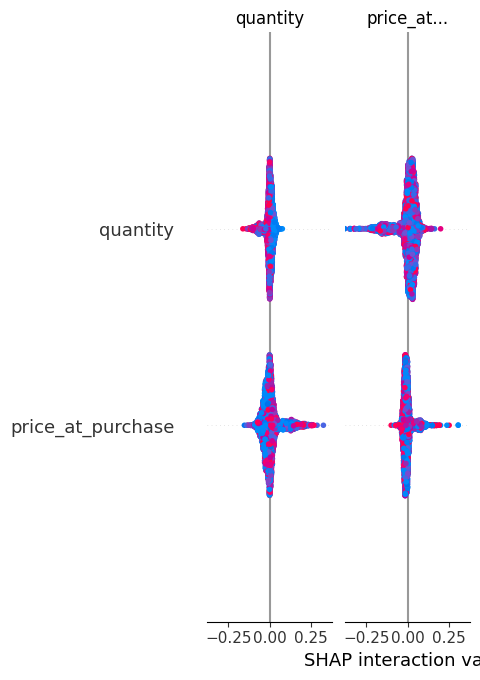

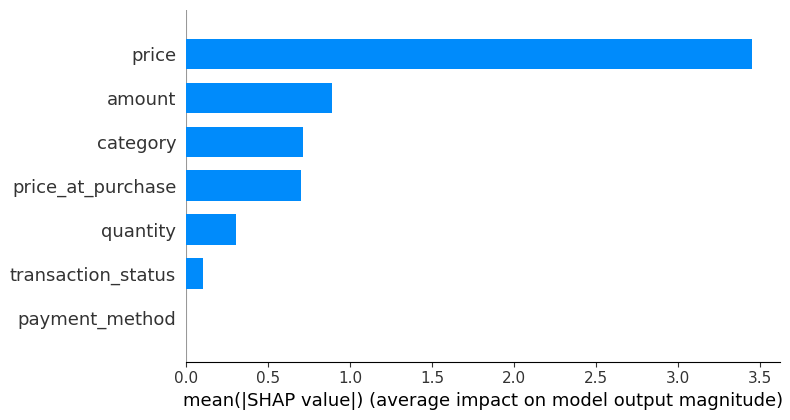

In [16]:
import shap

# Tạo SHAP explainer cho Random Forest và XGBoost
rf_explainer = shap.TreeExplainer(rf_best_model)
xgb_explainer = shap.TreeExplainer(xgb_best_model)

# Tính toán SHAP values cho tập kiểm tra
rf_shap_values = rf_explainer.shap_values(X_class_test)
xgb_shap_values = xgb_explainer.shap_values(X_class_test)

# Vẽ biểu đồ tầm quan trọng của các đặc trưng
shap.summary_plot(rf_shap_values, X_class_test, plot_type="bar", show=True, title="RF Feature Importance")
shap.summary_plot(xgb_shap_values, X_class_test, plot_type="bar", show=True, title="XGB Feature Importance")


In [17]:
print(rf_shap_values.shape)  # Kích thước giá trị SHAP cho Random Forest
print(xgb_shap_values.shape)  # Kích thước giá trị SHAP cho XGBoost
print(X_class_test.iloc[0].shape)  # Kích thước đặc trưng của mẫu đầu vào


(5835, 7, 2)
(5835, 7)
(7,)


In [18]:
# Dự đoán mẫu cụ thể với mô hình XGBoost
shap.force_plot(
    xgb_explainer.expected_value,  # Giá trị cơ sở
    xgb_shap_values[0],            # Giá trị SHAP của mẫu đầu tiên
    X_class_test.iloc[0].values,   # Đặc trưng của mẫu đầu tiên
    show=True
)


In [19]:
# Khởi tạo giao diện JavaScript
shap.initjs()

# Dự đoán mẫu cụ thể với mô hình Random Forest - Lớp 0
print("Force plot for Class 0:")
shap.force_plot(
    rf_explainer.expected_value[0],  # Giá trị cơ sở của lớp 0
    rf_shap_values[0, :, 0],         # Giá trị SHAP của mẫu đầu tiên và lớp 0
    X_class_test.iloc[0].values,    # Đặc trưng của mẫu đầu tiên
    show=True
)


Force plot for Class 0:


In [20]:
# Dự đoán mẫu cụ thể với mô hình Random Forest - Lớp 1
print("Force plot for Class 1:")
shap.force_plot(
    rf_explainer.expected_value[1],  # Giá trị cơ sở của lớp 1
    rf_shap_values[0, :, 1],         # Giá trị SHAP của mẫu đầu tiên và lớp 1
    X_class_test.iloc[0].values,    # Đặc trưng của mẫu đầu tiên
    show=True
)

Force plot for Class 1:


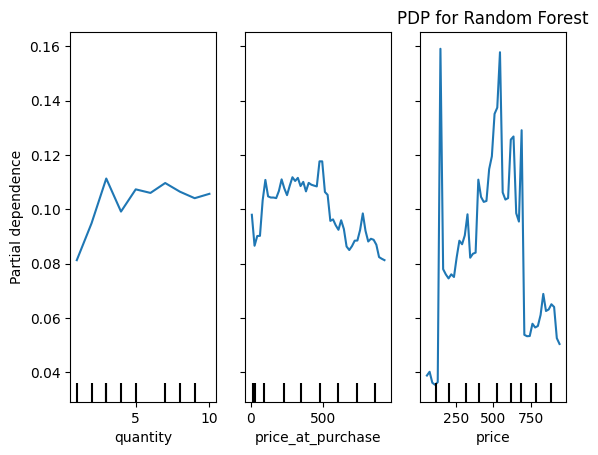

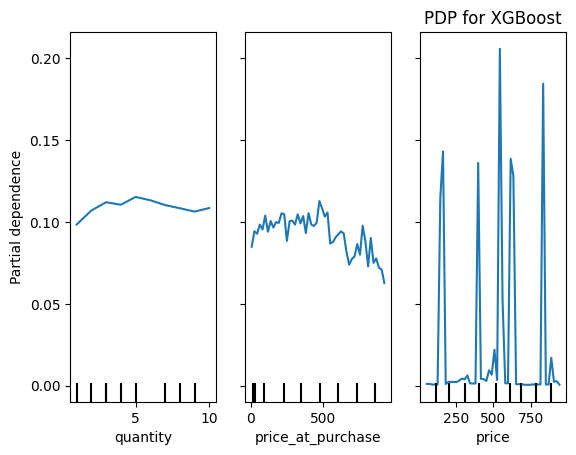

In [21]:
from sklearn.inspection import PartialDependenceDisplay

# Vẽ PDP cho Random Forest
PartialDependenceDisplay.from_estimator(rf_best_model, X_class_train, features=[0, 1, 2], grid_resolution=50)
plt.title("PDP for Random Forest")
plt.show()

# Vẽ PDP cho XGBoost
PartialDependenceDisplay.from_estimator(xgb_best_model, X_class_train, features=[0, 1, 2], grid_resolution=50)
plt.title("PDP for XGBoost")
plt.show()


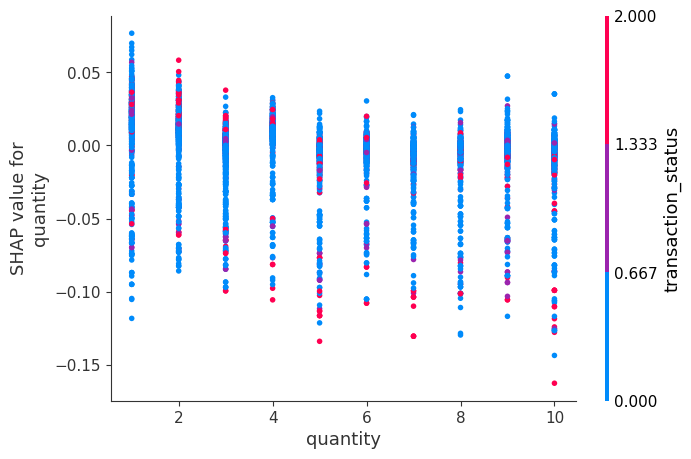

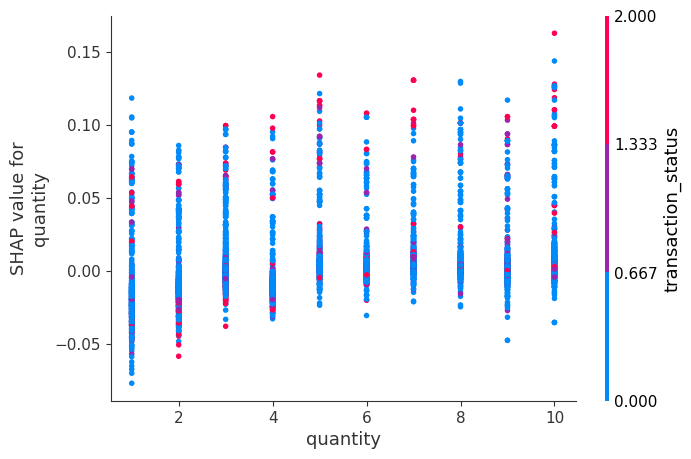

In [22]:
import shap

# Vẽ biểu đồ tương tác đặc trưng cho lớp 0 của Random Forest
shap.dependence_plot(0, rf_shap_values[:, :, 0], X_class_test)  # Đặc trưng thứ 0, lớp 0

# Vẽ biểu đồ tương tác đặc trưng cho lớp 1 của Random Forest
shap.dependence_plot(0, rf_shap_values[:, :, 1], X_class_test)  # Đặc trưng thứ 0, lớp 1


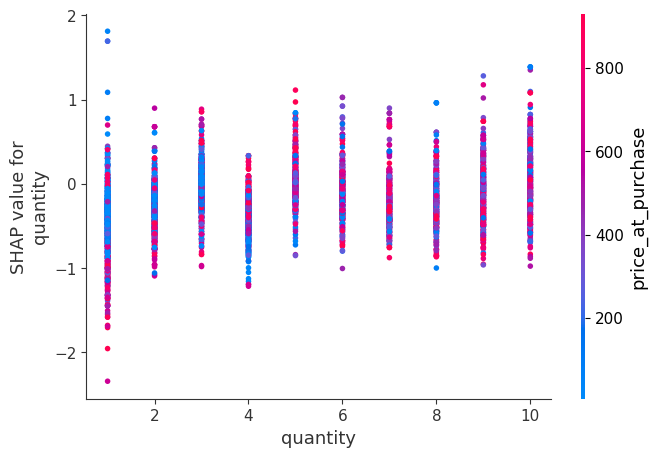

In [23]:
# Vẽ biểu đồ tương tác đặc trưng cho XGBoost
shap.dependence_plot(0, xgb_shap_values, X_class_test)  # Đặc trưng thứ 0


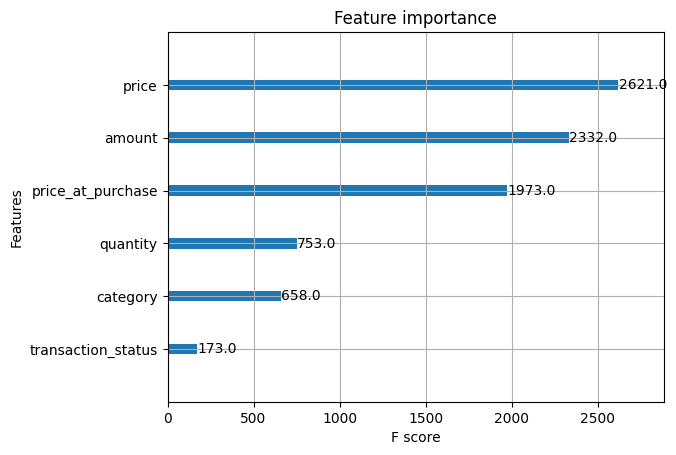

In [24]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Vẽ gradient của một cây XGBoost
xgb.plot_importance(xgb_best_model, importance_type='weight')
plt.show()


In [25]:
# Truy cập gradient và hessian trong XGBoost
dtrain = xgb.DMatrix(X_class_train, label=y_class_train)
booster = xgb_best_model.get_booster()

# Tính toán gradient và hessian
grad, hess = booster.predict(dtrain, pred_leaf=True), booster.predict(dtrain, pred_leaf=False)

# Kiểm tra giá trị đầu tiên
print("Gradient của mẫu đầu tiên:", grad[0])
print("Hessian của mẫu đầu tiên:", hess[0])


Gradient của mẫu đầu tiên: [ 54.  18.  18.  18.  18.  18. 221. 194.  11.  23. 104. 163. 102.   7.
 174. 104. 166. 212.  25. 119.  48. 116. 134. 156. 256. 250. 115. 130.
 120. 126.  78.  85. 196.  66. 112. 101. 100. 165.  96.  18. 145. 108.
 108.  46. 106. 146. 164.  82. 154.  45.   8. 124. 112.  88.  46.  50.
 136. 112.  56. 145.  58. 106. 106.  84.   8.  68.  61. 109. 104.  95.
  99.  95.  70. 138. 122. 122. 122. 170. 110.  91. 111.  74.  39.  76.
 121. 109.  86.  49.  84.  55. 146.  70. 113.  37.  80.  60. 115.  47.
 103.  64.  90.  61.  34.  40.  51. 130.  33.  60.  58.  57.  44.  36.
  34.  42.  62.  91.  92.  68.  54.  33.  58.  43.  55.  77.  29.  79.
  88.  43.  61.  95.  30.  38.  48.  43.  31.  38.  48.  48.  48.  95.
 127.  72.  90.  46.  42. 106.   9.  18.  15.  39.]
Hessian của mẫu đầu tiên: 0.00012447852


In [26]:
from lime.lime_tabular import LimeTabularExplainer

# Tạo LIME explainer
explainer = LimeTabularExplainer(X_class_train.values, feature_names=X_class_train.columns, class_names=["Prediction"], mode="regression")

# Giải thích dự đoán cho một mẫu
exp = explainer.explain_instance(X_class_test.iloc[0].values, rf_best_model.predict)
exp.show_in_notebook()


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


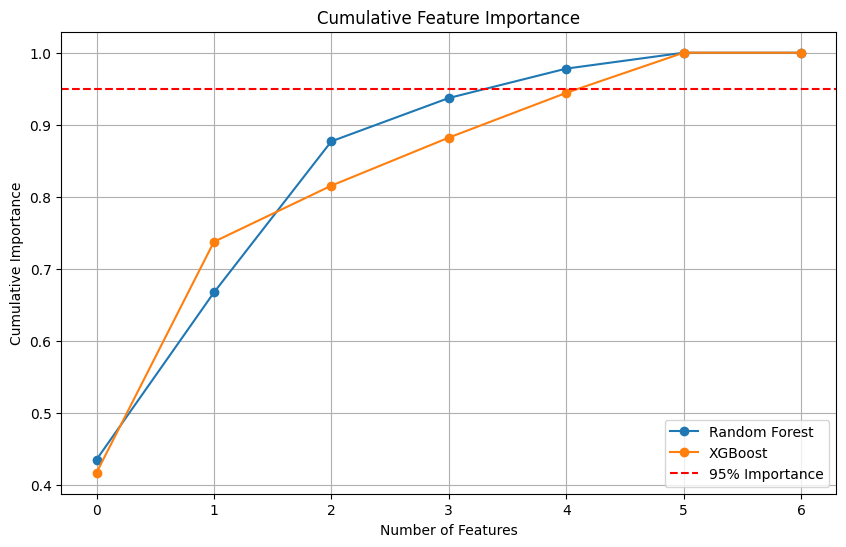

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Lấy tầm quan trọng của đặc trưng từ RF và XGB
rf_importance = rf_best_model.feature_importances_
xgb_importance = xgb_best_model.feature_importances_

# Tính giá trị tích lũy
rf_cumulative_importance = np.cumsum(np.sort(rf_importance)[::-1])
xgb_cumulative_importance = np.cumsum(np.sort(xgb_importance)[::-1])

# Vẽ biểu đồ tích lũy
plt.figure(figsize=(10, 6))
plt.plot(rf_cumulative_importance, label="Random Forest", marker='o')
plt.plot(xgb_cumulative_importance, label="XGBoost", marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Importance")
plt.title("Cumulative Feature Importance")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.legend()
plt.grid(True)
plt.show()


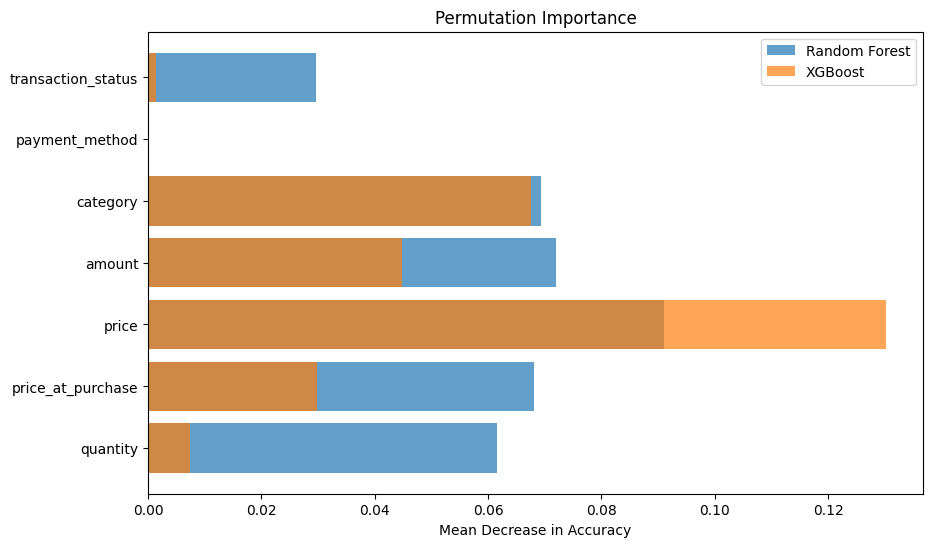

In [28]:
from sklearn.inspection import permutation_importance

# Tính permutation importance cho RF
rf_perm_importance = permutation_importance(rf_best_model, X_class_test, y_class_test, n_repeats=10, random_state=42)

# Tính permutation importance cho XGBoost
xgb_perm_importance = permutation_importance(xgb_best_model, X_class_test, y_class_test, n_repeats=10, random_state=42)

# Trực quan hóa
plt.figure(figsize=(10, 6))
plt.barh(X_class_test.columns, rf_perm_importance.importances_mean, alpha=0.7, label="Random Forest")
plt.barh(X_class_test.columns, xgb_perm_importance.importances_mean, alpha=0.7, label="XGBoost")
plt.title("Permutation Importance")
plt.xlabel("Mean Decrease in Accuracy")
plt.legend()
plt.show()


Độ chính xác ban đầu (original_score): 0.9763


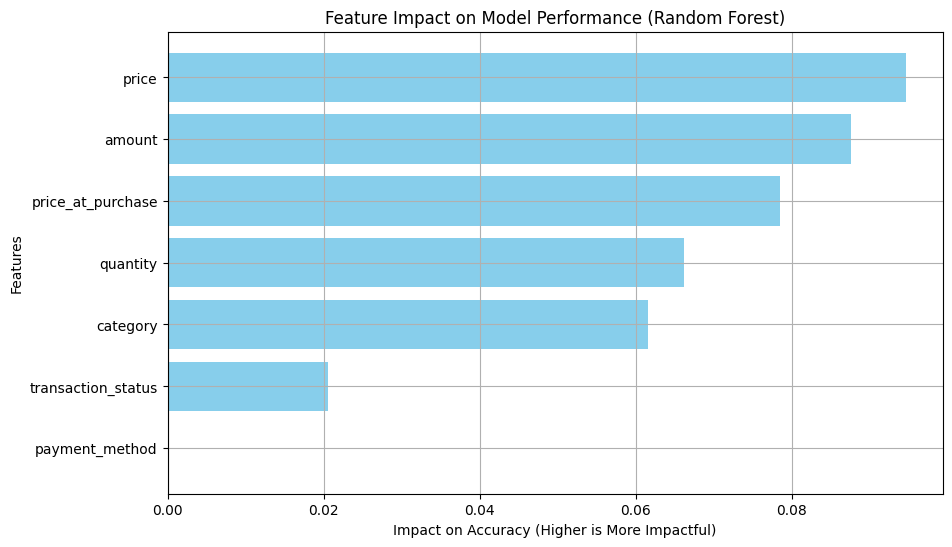

Feature Impact on Model Performance


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# Tính độ chính xác ban đầu trên tập kiểm tra đầy đủ
original_score = accuracy_score(y_class_test, rf_best_model.predict(X_class_test))
print(f"Độ chính xác ban đầu (original_score): {original_score:.4f}")

# Tính mức độ ảnh hưởng của từng đặc trưng
feature_impact = {}

for feature in X_class_test.columns:
    # Tạo bản sao dữ liệu kiểm tra và loại bỏ đặc trưng hiện tại
    X_test_no_feature = X_class_test.copy()
    X_test_no_feature[feature] = 0  # Thay giá trị bằng 0 hoặc giá trị trung bình

    # Dự đoán lại và tính độ chính xác
    new_score = accuracy_score(y_class_test, rf_best_model.predict(X_test_no_feature))
    impact = original_score - new_score  # Ảnh hưởng là độ giảm độ chính xác
    feature_impact[feature] = impact

# Chuyển kết quả sang DataFrame để trực quan hóa
impact_df = pd.DataFrame(list(feature_impact.items()), columns=["Feature", "Impact"])
impact_df.sort_values(by="Impact", ascending=False, inplace=True)

# Trực quan hóa mức độ ảnh hưởng
plt.figure(figsize=(10, 6))
plt.barh(impact_df["Feature"], impact_df["Impact"], color="skyblue")
plt.xlabel("Impact on Accuracy (Higher is More Impactful)")
plt.ylabel("Features")
plt.title("Feature Impact on Model Performance (Random Forest)")
plt.gca().invert_yaxis()  # Đảo ngược trục Y để hiển thị đặc trưng quan trọng nhất ở trên cùng
plt.grid(True)
plt.show()

# In bảng kết quả
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Feature Impact on Model Performance", dataframe=impact_df)


In [30]:
import time

# Đo thời gian huấn luyện RF
start_time = time.time()
rf_best_model.fit(X_class_train, y_class_train)
rf_train_time = time.time() - start_time

# Đo thời gian huấn luyện XGB
start_time = time.time()
xgb_best_model.fit(X_class_train, y_class_train)
xgb_train_time = time.time() - start_time

print(f"Thời gian huấn luyện RF: {rf_train_time:.2f} giây")
print(f"Thời gian huấn luyện XGB: {xgb_train_time:.2f} giây")


Thời gian huấn luyện RF: 3.33 giây
Thời gian huấn luyện XGB: 0.16 giây


In [31]:
# So sánh hiệu suất trên tập huấn luyện và kiểm tra
rf_train_score = rf_best_model.score(X_class_train, y_class_train)
rf_test_score = rf_best_model.score(X_class_train, y_class_train)

xgb_train_score = xgb_best_model.score(X_class_train, y_class_train)
xgb_test_score = xgb_best_model.score(X_class_train, y_class_train)

print("Random Forest:")
print(f"Độ chính xác trên tập huấn luyện: {rf_train_score:.2f}")
print(f"Độ chính xác trên tập kiểm tra: {rf_test_score:.2f}")

print("XGBoost:")
print(f"Độ chính xác trên tập huấn luyện: {xgb_train_score:.2f}")
print(f"Độ chính xác trên tập kiểm tra: {xgb_test_score:.2f}")


Random Forest:
Độ chính xác trên tập huấn luyện: 0.98
Độ chính xác trên tập kiểm tra: 0.98
XGBoost:
Độ chính xác trên tập huấn luyện: 1.00
Độ chính xác trên tập kiểm tra: 1.00


In [32]:
# Tạo thêm nhiều đặc trưng ngẫu nhiên
import numpy as np
X_reg_train_expanded = X_class_train.copy()
X_reg_test_expanded = X_class_test.copy()

for i in range(20):  # Thêm 20 đặc trưng ngẫu nhiên
    X_reg_train_expanded[f"random_feature_{i}"] = np.random.rand(X_class_train.shape[0])
    X_reg_test_expanded[f"random_feature_{i}"] = np.random.rand(X_class_test.shape[0])

# Huấn luyện lại RF và XGB trên dữ liệu mở rộng
rf_best_model.fit(X_reg_train_expanded, y_class_train)
xgb_best_model.fit(X_reg_train_expanded, y_class_train)

# Đánh giá trên dữ liệu kiểm tra
rf_score_expanded = rf_best_model.score(X_reg_test_expanded, y_class_test)
xgb_score_expanded = xgb_best_model.score(X_reg_test_expanded, y_class_test)

print("Hiệu suất trên dữ liệu nhiều chiều:")
print(f"Random Forest: {rf_score_expanded:.2f}")
print(f"XGBoost: {xgb_score_expanded:.2f}")


Hiệu suất trên dữ liệu nhiều chiều:
Random Forest: 0.88
XGBoost: 0.98


# HUẤN LUYỆN VÀ PHÂN TÍCH MÔ HÌNH HỒI QUY

In [33]:
# Kiểm tra các cột trong dữ liệu hồi quy đã lưu
print(regression_data.columns)

Index(['quantity', 'price_at_purchase', 'price', 'amount', 'category',
       'payment_method', 'transaction_status', 'total_price'],
      dtype='object')


Model Comparison with GridSearchCV and Cross-Validation


Regression Model Evaluation


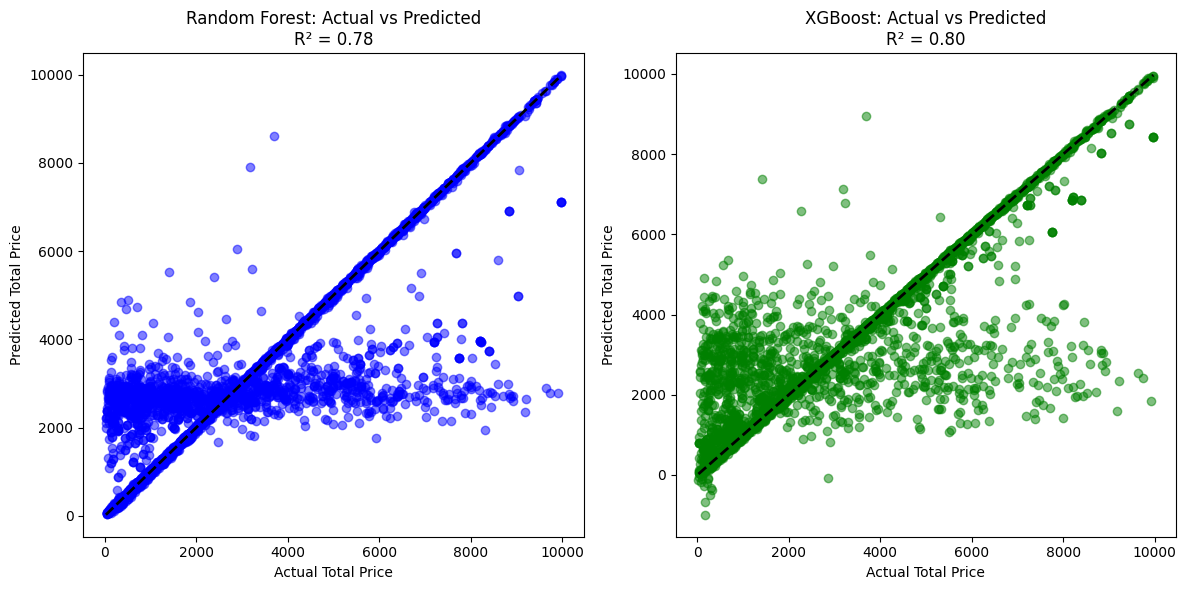

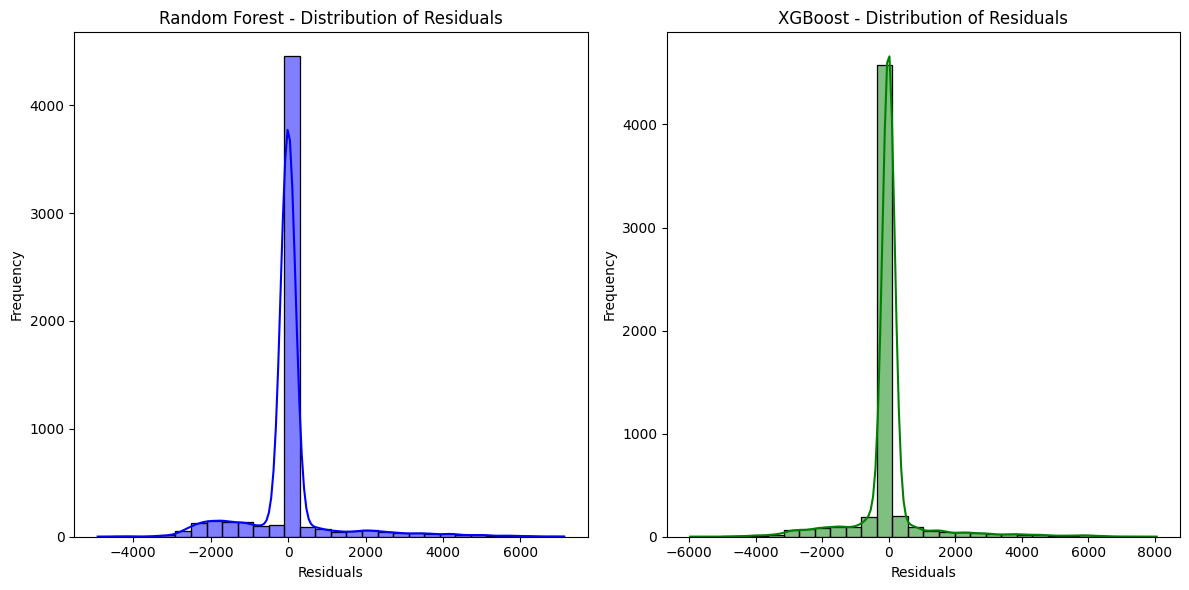

In [34]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Step 1: Prepare features and target for regression
# Dự đoán giá trị 'total_price' từ dữ liệu hồi quy đã lưu
X_reg = regression_data.drop(columns=['total_price'])  # Cột cần dự đoán
y_reg = regression_data['total_price']  # Cột mục tiêu

# Step 2: Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Step 3: Set up K-Fold Cross Validation (thay thế StratifiedKFold)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Define model and hyperparameters for GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Step 5: Initialize RandomForest and XGBoost regressors
rf_regressor = RandomForestRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42, eval_metric='logloss')

# Step 6: Apply GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_regressor, rf_param_grid, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_reg_train, y_reg_train)

# Step 7: Apply GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(xgb_regressor, xgb_param_grid, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_reg_train, y_reg_train)

# Step 8: Evaluate models after GridSearchCV
rf_best_model = rf_grid_search.best_estimator_
xgb_best_model = xgb_grid_search.best_estimator_

# Step 9: Cross-validate both models with the optimal hyperparameters
rf_cv_scores = cross_val_score(rf_best_model, X_reg_train, y_reg_train, cv=cv, scoring='neg_mean_squared_error')
xgb_cv_scores = cross_val_score(xgb_best_model, X_reg_train, y_reg_train, cv=cv, scoring='neg_mean_squared_error')

# Step 10: Display the cross-validation results and best parameters
rf_best_params = rf_grid_search.best_params_
xgb_best_params = xgb_grid_search.best_params_

rf_cv_mean = rf_cv_scores.mean()
xgb_cv_mean = xgb_cv_scores.mean()

# Prepare results for display
results = {
    "Random Forest Best Params": rf_best_params,
    "Random Forest CV MSE": -rf_cv_mean,
    "XGBoost Best Params": xgb_best_params,
    "XGBoost CV MSE": -xgb_cv_mean
}

# Display the results
tools.display_dataframe_to_user(name="Model Comparison with GridSearchCV and Cross-Validation", dataframe=pd.DataFrame([results]))

# Step 11: Get predictions on test set (using the best model from GridSearchCV)
rf_reg_pred = rf_best_model.predict(X_reg_test)
xgb_reg_pred = xgb_best_model.predict(X_reg_test)

# Step 12: Calculate R² score and MSE for both models
rf_r2 = r2_score(y_reg_test, rf_reg_pred)
xgb_r2 = r2_score(y_reg_test, xgb_reg_pred)

rf_mse = mean_squared_error(y_reg_test, rf_reg_pred)
xgb_mse = mean_squared_error(y_reg_test, xgb_reg_pred)

# Prepare evaluation metrics
regression_metrics = {
    "Random Forest R²": rf_r2,
    "Random Forest MSE": rf_mse,
    "XGBoost R²": xgb_r2,
    "XGBoost MSE": xgb_mse
}

# Display evaluation metrics
tools.display_dataframe_to_user(name="Regression Model Evaluation", dataframe=pd.DataFrame([regression_metrics]))

# Step 13: Plot predicted vs actual for both models
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_reg_test, rf_reg_pred, alpha=0.5, color='blue')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'k--', lw=2)
plt.title(f'Random Forest: Actual vs Predicted\nR² = {rf_r2:.2f}')
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_reg_test, xgb_reg_pred, alpha=0.5, color='green')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'k--', lw=2)
plt.title(f'XGBoost: Actual vs Predicted\nR² = {xgb_r2:.2f}')
plt.xlabel('Actual Total Price')
plt.ylabel('Predicted Total Price')

plt.tight_layout()
plt.show()

# Step 14: Visualize residuals (errors)
rf_residuals = y_reg_test - rf_reg_pred
xgb_residuals = y_reg_test - xgb_reg_pred

plt.figure(figsize=(12, 6))

# Random Forest residuals
plt.subplot(1, 2, 1)
import seaborn as sns
sns.histplot(rf_residuals, kde=True, color='blue', bins=30)
plt.title('Random Forest - Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# XGBoost residuals
plt.subplot(1, 2, 2)
sns.histplot(xgb_residuals, kde=True, color='green', bins=30)
plt.title('XGBoost - Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


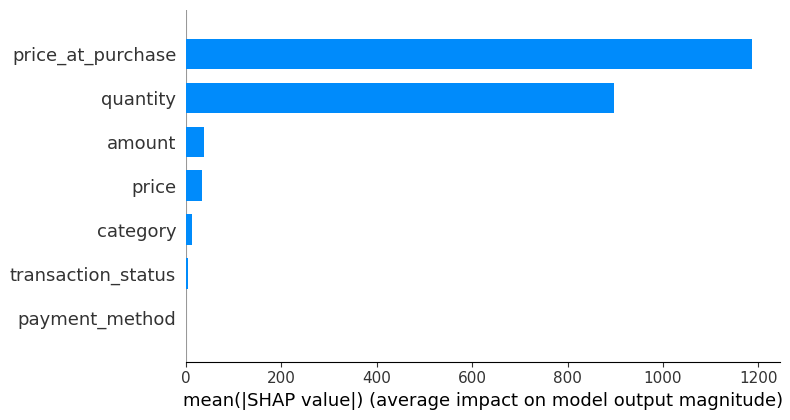

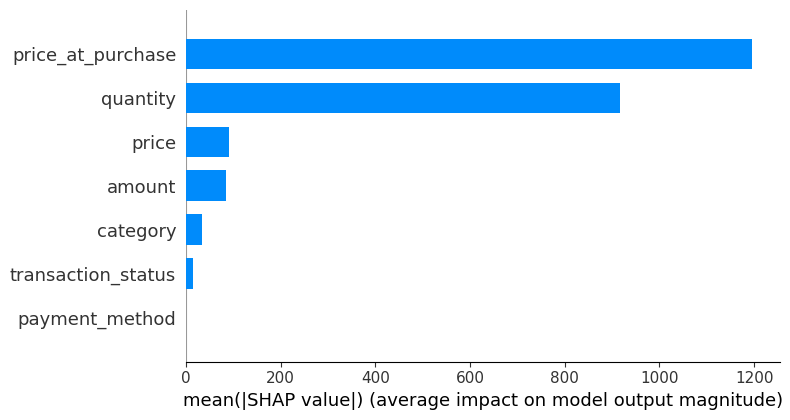

In [35]:
import shap

# Tạo SHAP explainer cho Random Forest và XGBoost
rf_explainer = shap.TreeExplainer(rf_best_model)
xgb_explainer = shap.TreeExplainer(xgb_best_model)

# Tính toán SHAP values cho tập kiểm tra
rf_shap_values = rf_explainer.shap_values(X_reg_test)
xgb_shap_values = xgb_explainer.shap_values(X_reg_test)

# Vẽ biểu đồ tầm quan trọng của các đặc trưng
shap.summary_plot(rf_shap_values, X_reg_test, plot_type="bar", show=True, title="RF Feature Importance")
shap.summary_plot(xgb_shap_values, X_reg_test, plot_type="bar", show=True, title="XGB Feature Importance")


In [36]:
# Giải thích dự đoán của một mẫu cụ thể
shap.initjs()
shap.force_plot(rf_explainer.expected_value, rf_shap_values[0], X_reg_test.iloc[0], show=True)
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[0], X_reg_test.iloc[0], show=True)


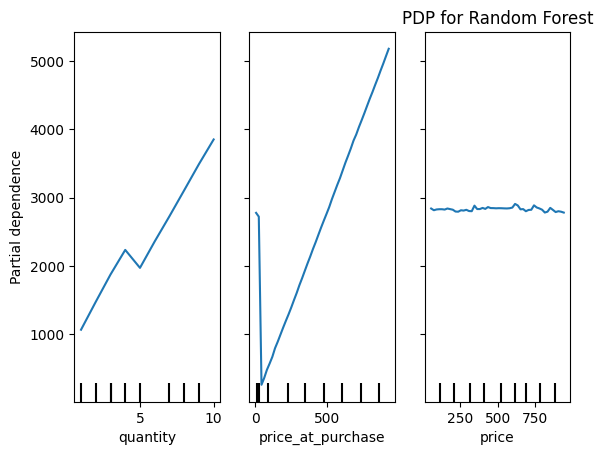

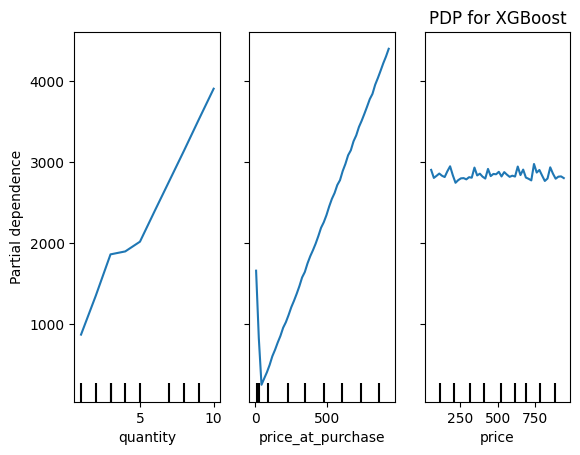

In [37]:
from sklearn.inspection import PartialDependenceDisplay

# Vẽ PDP cho Random Forest
PartialDependenceDisplay.from_estimator(rf_best_model, X_reg_train, features=[0, 1, 2], grid_resolution=50)
plt.title("PDP for Random Forest")
plt.show()

# Vẽ PDP cho XGBoost
PartialDependenceDisplay.from_estimator(xgb_best_model, X_reg_train, features=[0, 1, 2], grid_resolution=50)
plt.title("PDP for XGBoost")
plt.show()


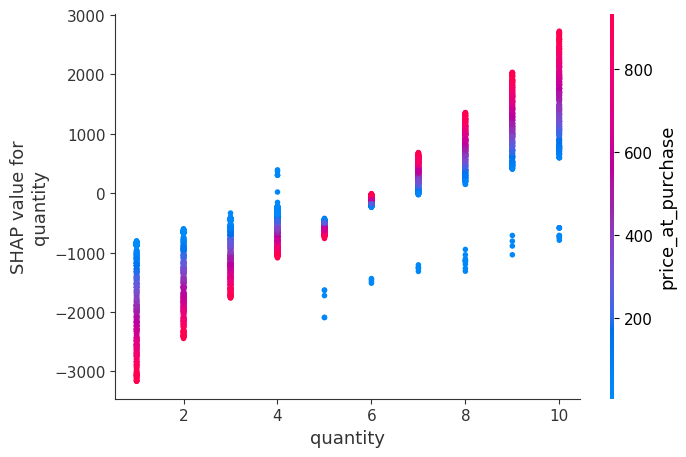

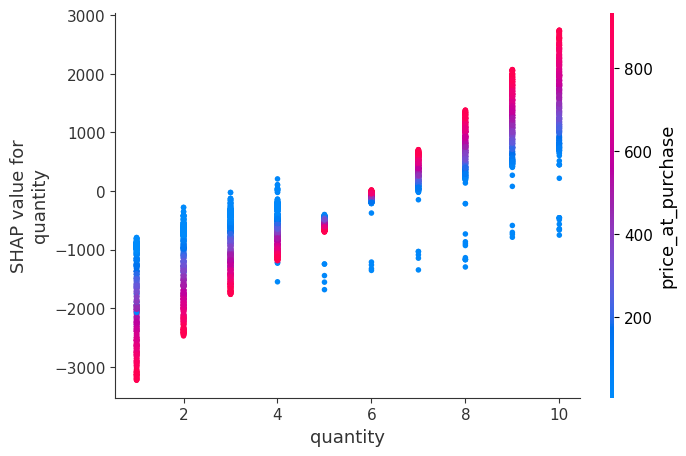

In [38]:
import shap

# Vẽ biểu đồ tương tác đặc trưng
shap.dependence_plot(0, rf_shap_values, X_reg_test)  # Đặc trưng thứ 0 cho RF
shap.dependence_plot(0, xgb_shap_values, X_reg_test)  # Đặc trưng thứ 0 cho XGB


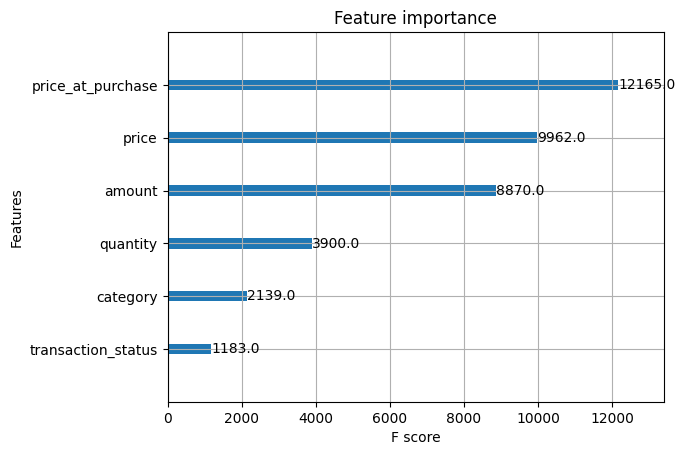

In [39]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Vẽ gradient của một cây XGBoost
xgb.plot_importance(xgb_best_model, importance_type='weight')
plt.show()


In [40]:
# Truy cập gradient và hessian trong XGBoost
dtrain = xgb.DMatrix(X_reg_train, label=y_reg_train)
booster = xgb_best_model.get_booster()

# Tính toán gradient và hessian
grad, hess = booster.predict(dtrain, pred_leaf=True), booster.predict(dtrain, pred_leaf=False)

# Kiểm tra giá trị đầu tiên
print("Gradient của mẫu đầu tiên:", grad[0])
print("Hessian của mẫu đầu tiên:", hess[0])


Gradient của mẫu đầu tiên: [416. 430. 429. 446. 443. 445. 509. 505. 460. 483. 501. 456. 475. 497.
 434. 481. 537. 450. 455. 468. 506. 544. 546. 702. 600. 569. 596. 547.
 596. 854. 881. 693. 852. 785. 851. 796. 792. 995. 833. 765. 761. 788.
 868. 793. 816. 848. 828. 648. 902. 765. 763. 686. 827. 575. 594. 737.
 346. 619. 426. 306. 557. 480. 458. 357. 600. 580. 375. 598. 572. 507.
 504. 556. 568. 572. 556. 533. 354. 398. 539. 456. 461. 644. 524. 734.
 505. 469. 737. 470. 766. 268. 555. 706. 581. 567. 644. 513. 394. 652.
 736. 446.]
Hessian của mẫu đầu tiên: 3113.5188


In [41]:
from lime.lime_tabular import LimeTabularExplainer

# Tạo LIME explainer
explainer = LimeTabularExplainer(X_reg_train.values, feature_names=X_reg_train.columns, class_names=["Prediction"], mode="regression")

# Giải thích dự đoán cho một mẫu
exp = explainer.explain_instance(X_reg_test.iloc[0].values, rf_best_model.predict)
exp.show_in_notebook()


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


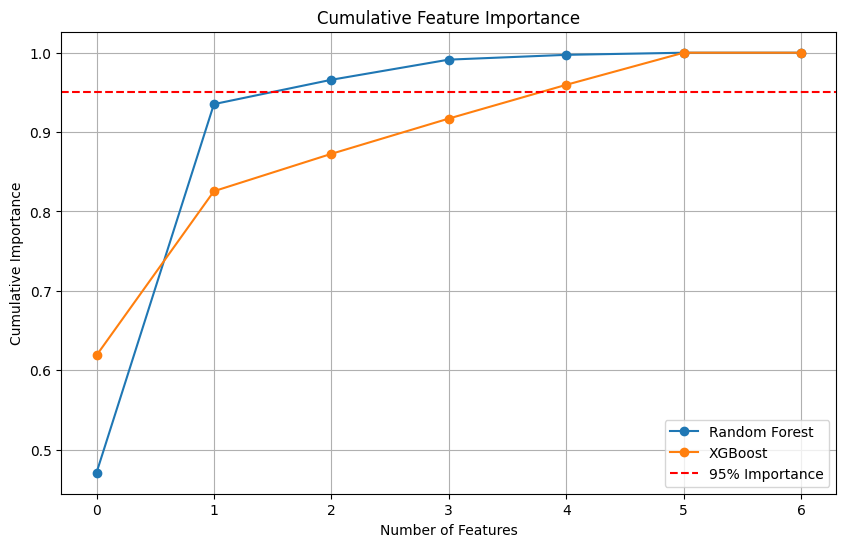

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Lấy tầm quan trọng của đặc trưng từ RF và XGB
rf_importance = rf_best_model.feature_importances_
xgb_importance = xgb_best_model.feature_importances_

# Tính giá trị tích lũy
rf_cumulative_importance = np.cumsum(np.sort(rf_importance)[::-1])
xgb_cumulative_importance = np.cumsum(np.sort(xgb_importance)[::-1])

# Vẽ biểu đồ tích lũy
plt.figure(figsize=(10, 6))
plt.plot(rf_cumulative_importance, label="Random Forest", marker='o')
plt.plot(xgb_cumulative_importance, label="XGBoost", marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Importance")
plt.title("Cumulative Feature Importance")
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.legend()
plt.grid(True)
plt.show()


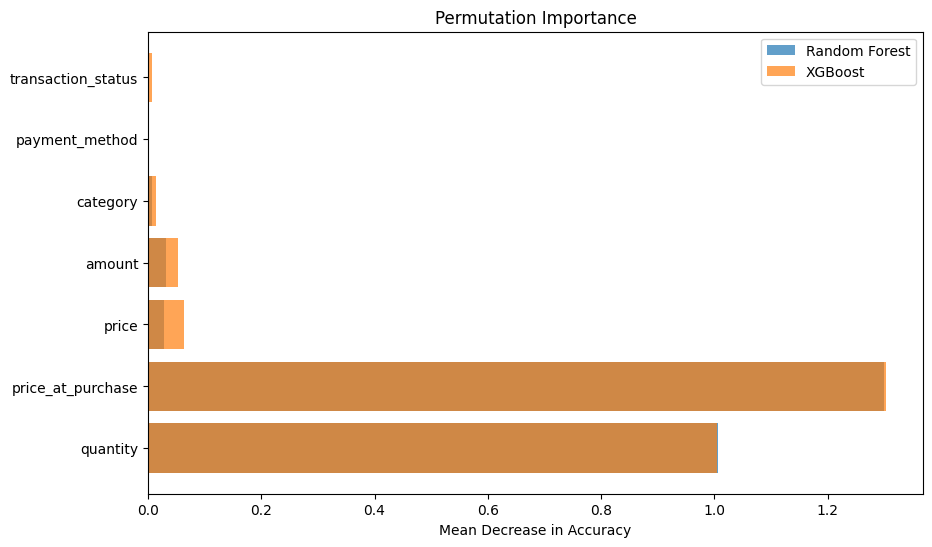

In [43]:
from sklearn.inspection import permutation_importance

# Tính permutation importance cho RF
rf_perm_importance = permutation_importance(rf_best_model, X_reg_test, y_reg_test, n_repeats=10, random_state=42)

# Tính permutation importance cho XGBoost
xgb_perm_importance = permutation_importance(xgb_best_model, X_reg_test, y_reg_test, n_repeats=10, random_state=42)

# Trực quan hóa
plt.figure(figsize=(10, 6))
plt.barh(X_reg_test.columns, rf_perm_importance.importances_mean, alpha=0.7, label="Random Forest")
plt.barh(X_reg_test.columns, xgb_perm_importance.importances_mean, alpha=0.7, label="XGBoost")
plt.title("Permutation Importance")
plt.xlabel("Mean Decrease in Accuracy")
plt.legend()
plt.show()


MSE ban đầu (original_score): 1131524.83


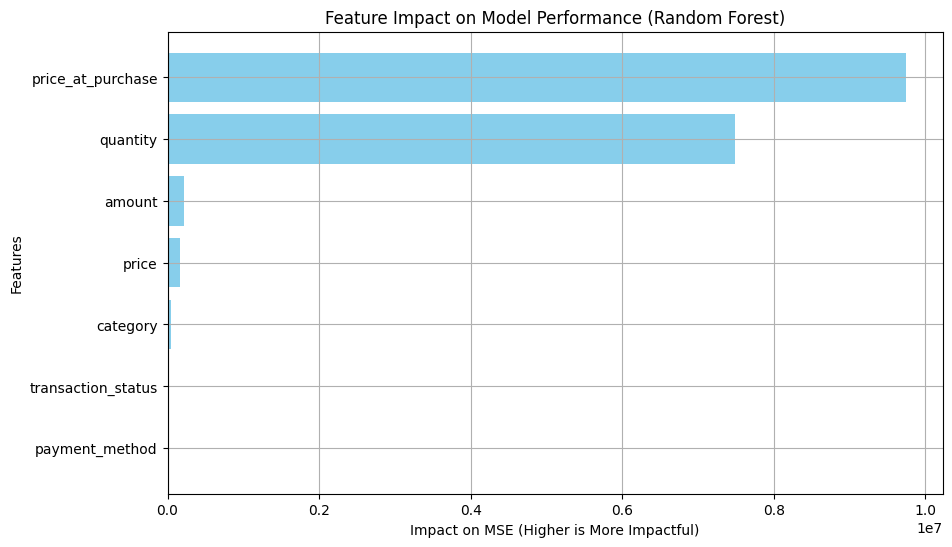

Feature Impact on Model Performance


In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# Tính MSE ban đầu trên tập kiểm tra đầy đủ
original_score = mean_squared_error(y_reg_test, rf_best_model.predict(X_reg_test))
print(f"MSE ban đầu (original_score): {original_score:.2f}")

# Tính mức độ ảnh hưởng của từng đặc trưng
feature_impact = {}

for feature in X_reg_test.columns:
    # Tạo bản sao dữ liệu kiểm tra và loại bỏ đặc trưng hiện tại
    X_test_no_feature = X_reg_test.copy()
    X_test_no_feature[feature] = 0  # Thay giá trị bằng 0 hoặc giá trị trung bình

    # Dự đoán lại và tính MSE
    new_score = mean_squared_error(y_reg_test, rf_best_model.predict(X_test_no_feature))
    impact = new_score - original_score
    feature_impact[feature] = impact

# Chuyển kết quả sang DataFrame để trực quan hóa
impact_df = pd.DataFrame(list(feature_impact.items()), columns=["Feature", "Impact"])
impact_df.sort_values(by="Impact", ascending=False, inplace=True)

# Trực quan hóa mức độ ảnh hưởng
plt.figure(figsize=(10, 6))
plt.barh(impact_df["Feature"], impact_df["Impact"], color="skyblue")
plt.xlabel("Impact on MSE (Higher is More Impactful)")
plt.ylabel("Features")
plt.title("Feature Impact on Model Performance (Random Forest)")
plt.gca().invert_yaxis()  # Đảo ngược trục Y để hiển thị đặc trưng quan trọng nhất ở trên cùng
plt.grid(True)
plt.show()

# In bảng kết quả
tools.display_dataframe_to_user(name="Feature Impact on Model Performance", dataframe=impact_df)


In [45]:
import time

# Đo thời gian huấn luyện RF
start_time = time.time()
rf_best_model.fit(X_reg_train, y_reg_train)
rf_train_time = time.time() - start_time

# Đo thời gian huấn luyện XGB
start_time = time.time()
xgb_best_model.fit(X_reg_train, y_reg_train)
xgb_train_time = time.time() - start_time

print(f"Thời gian huấn luyện RF: {rf_train_time:.2f} giây")
print(f"Thời gian huấn luyện XGB: {xgb_train_time:.2f} giây")


Thời gian huấn luyện RF: 21.36 giây
Thời gian huấn luyện XGB: 0.30 giây


In [46]:
# So sánh hiệu suất trên tập huấn luyện và kiểm tra
rf_train_score = rf_best_model.score(X_reg_train, y_reg_train)
rf_test_score = rf_best_model.score(X_reg_test, y_reg_test)

xgb_train_score = xgb_best_model.score(X_reg_train, y_reg_train)
xgb_test_score = xgb_best_model.score(X_reg_test, y_reg_test)

print("Random Forest:")
print(f"Độ chính xác trên tập huấn luyện: {rf_train_score:.2f}")
print(f"Độ chính xác trên tập kiểm tra: {rf_test_score:.2f}")

print("XGBoost:")
print(f"Độ chính xác trên tập huấn luyện: {xgb_train_score:.2f}")
print(f"Độ chính xác trên tập kiểm tra: {xgb_test_score:.2f}")


Random Forest:
Độ chính xác trên tập huấn luyện: 0.84
Độ chính xác trên tập kiểm tra: 0.78
XGBoost:
Độ chính xác trên tập huấn luyện: 0.95
Độ chính xác trên tập kiểm tra: 0.80


In [47]:
# Tạo thêm nhiều đặc trưng ngẫu nhiên
import numpy as np
X_reg_train_expanded = X_reg_train.copy()
X_reg_test_expanded = X_reg_test.copy()

for i in range(20):  # Thêm 20 đặc trưng ngẫu nhiên
    X_reg_train_expanded[f"random_feature_{i}"] = np.random.rand(X_reg_train.shape[0])
    X_reg_test_expanded[f"random_feature_{i}"] = np.random.rand(X_reg_test.shape[0])

# Huấn luyện lại RF và XGB trên dữ liệu mở rộng
rf_best_model.fit(X_reg_train_expanded, y_reg_train)
xgb_best_model.fit(X_reg_train_expanded, y_reg_train)

# Đánh giá trên dữ liệu kiểm tra
rf_score_expanded = rf_best_model.score(X_reg_test_expanded, y_reg_test)
xgb_score_expanded = xgb_best_model.score(X_reg_test_expanded, y_reg_test)

print("Hiệu suất trên dữ liệu nhiều chiều:")
print(f"Random Forest: {rf_score_expanded:.2f}")
print(f"XGBoost: {xgb_score_expanded:.2f}")


Hiệu suất trên dữ liệu nhiều chiều:
Random Forest: 0.74
XGBoost: 0.75
